---
---

### Part 1
#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
### Part 2
#### 3. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement Decision Tree Classifier
- Implement Decision Tree Classifier w/ Cleaned Data
- Implement Decision Tree Classifier w/ Bagging
- Compare The Models


# Part 2
## 3. Prediction (Multi-class Classification)

### Import Libraries

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, classification_report,ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.tree import plot_tree
from yellowbrick.classifier import ClassPredictionError, ROCAUC

### Data Preprocessing

In [3]:
data=pd.read_csv("pendigits_txt.csv")
data_cleaned=pd.read_csv("handdigit_EDA.csv")

In [4]:
X=data.drop("class", axis=1)
y= data["class"]

In [5]:
X_train, X_test, y_train, y_test= train_test_split (X,y,test_size=0.25, shuffle=False)

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [6]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [7]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [8]:
eval_metric(dt_model, X_train, y_train, X_test, y_test)     #overfitting

Test_Set
[[264   0   0   0   0   0   0   2   6   0]
 [  0 266  20   2   1   0   0   1   2   0]
 [  0  13 276   0   0   1   0   2   0   2]
 [  0   7   0 266   0   3   0   0   1   1]
 [  0   1   0   2 283   4   0   0   0   0]
 [  0   0   1   6   3 247   0   2   2   6]
 [  4   3   1   0   4   0 244   1   5   2]
 [  2   9   2   1   5   0   2 247   1   0]
 [  1   0   0   0   0   2   1   0 252   0]
 [  0   3   0   2   0   5   0   6   0 250]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       272
           1       0.88      0.91      0.90       292
           2       0.92      0.94      0.93       294
           3       0.95      0.96      0.96       278
           4       0.96      0.98      0.97       290
           5       0.94      0.93      0.93       267
           6       0.99      0.92      0.95       264
           7       0.95      0.92      0.93       269
           8       0.94      0.98      0.96       256
           9       

In [9]:
scores=cross_validate(dt_model, X_train, y_train, 
                      scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                      return_train_score=True,
                      cv=5,
                      n_jobs=-1)
pd.DataFrame(scores)


fit_time  score_time  test_accuracy  train_accuracy  test_precision_macro  \
0  0.040139    0.004244       0.958763             1.0              0.958489   
1  0.041763    0.004121       0.959369             1.0              0.959222   
2  0.040337    0.004067       0.960582             1.0              0.960443   
3  0.040558    0.004390       0.955731             1.0              0.956561   
4  0.041726    0.004246       0.936286             1.0              0.937613   

   train_precision_macro  test_recall_macro  train_recall_macro  \
0                    1.0           0.959122                 1.0   
1                    1.0           0.959341                 1.0   
2                    1.0           0.960512                 1.0   
3                    1.0           0.955820                 1.0   
4                    1.0           0.936531                 1.0   

   test_f1_macro  train_f1_macro  
0       0.958680             1.0  
1       0.959177             1.0  
2       0.960417             1.0  
3       0.955897             1.0  
4       0.936701             1.0

In [10]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_accuracy            0.954146
train_accuracy           1.000000
test_precision_macro     0.954465
train_precision_macro    1.000000
test_recall_macro        0.954265
train_recall_macro       1.000000
test_f1_macro            0.954174
train_f1_macro           1.000000
dtype: float64

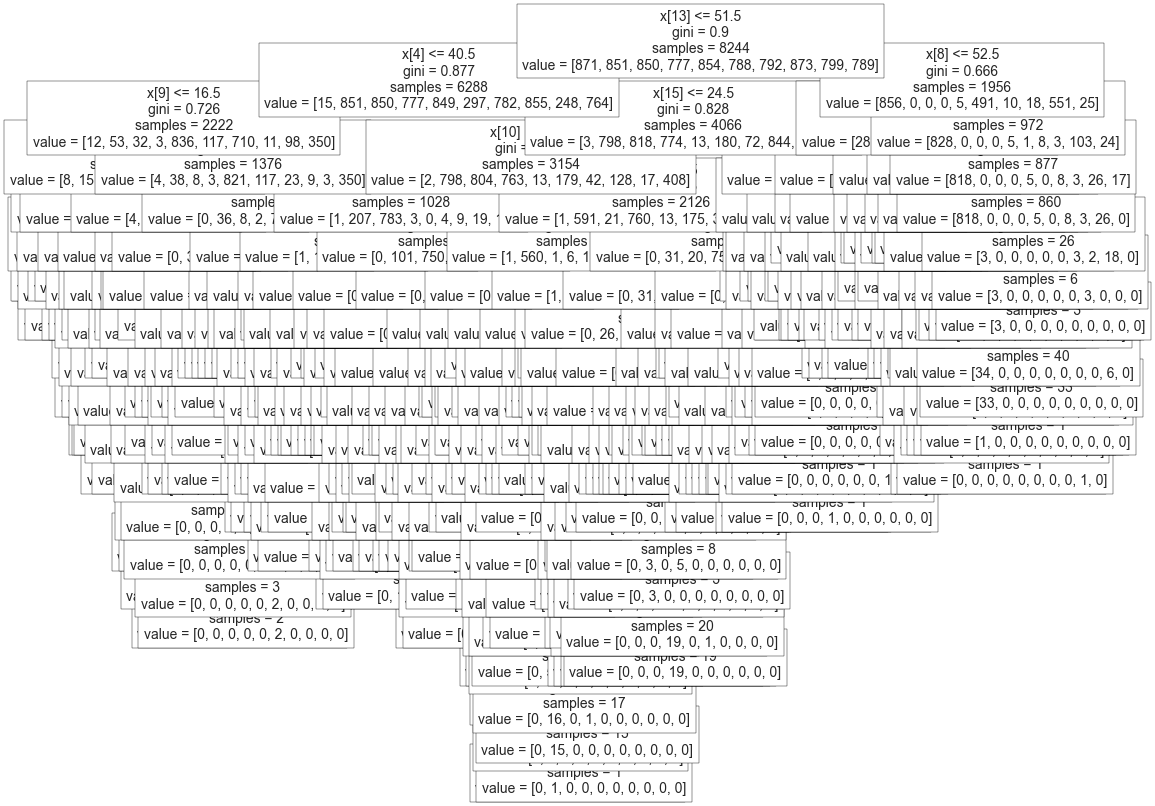

In [11]:
plt.figure(figsize=(12,10),dpi=100)
plot_tree(dt_model, fontsize=10);

### Fixing Overfit

In [12]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "sqrt", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [13]:
dt_model=DecisionTreeClassifier(random_state=101)
dt_grid=GridSearchCV(estimator=dt_model, 
                     param_grid=param_grid, 
                     scoring="f1_macro",
                     verbose=2,
                     n_jobs=-1)
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4410 candidates, totalling 22050 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=b

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_macro', verbose=2)

In [14]:
dt_grid.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [15]:
dt_grid.best_estimator_

DecisionTreeClassifier(min_samples_split=3, random_state=101, splitter='random')

In [16]:
dt_grid.best_score_

0.9575354530249454

In [17]:
dt_model=DecisionTreeClassifier(min_samples_split=3,splitter="random", random_state=101)


scores=cross_validate(dt_model, X_train, y_train, 
                      scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                      return_train_score=True,
                      cv=5,
                      n_jobs=-1)
pd.DataFrame(scores)

fit_time  score_time  test_accuracy  train_accuracy  test_precision_macro  \
0  0.009231    0.003879       0.967253        0.996816              0.967430   
1  0.008666    0.003643       0.959369        0.997422              0.959388   
2  0.009129    0.003785       0.957550        0.995906              0.957618   
3  0.009143    0.003570       0.949060        0.996967              0.949689   
4  0.008628    0.003577       0.955097        0.996513              0.955562   

   train_precision_macro  test_recall_macro  train_recall_macro  \
0               0.996908           0.967256            0.996783   
1               0.997506           0.958759            0.997388   
2               0.995983           0.957351            0.995847   
3               0.997025           0.948834            0.996919   
4               0.996560           0.954956            0.996480   

   test_f1_macro  train_f1_macro  
0       0.967310        0.996836  
1       0.958890        0.997442  
2       0.957438        0.995904  
3       0.949060        0.996966  
4       0.954979        0.996511

In [18]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_accuracy            0.957666
train_accuracy           0.996725
test_precision_macro     0.957937
train_precision_macro    0.996796
test_recall_macro        0.957431
train_recall_macro       0.996683
test_f1_macro            0.957535
train_f1_macro           0.996732
dtype: float64

In [19]:
dt_model=DecisionTreeClassifier(min_samples_split=3,splitter="random", random_state=101)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=3, random_state=101, splitter='random')

In [20]:
eval_metric(dt_model, X_train, y_train, X_test, y_test) 

Test_Set
[[268   0   1   0   0   0   1   0   2   0]
 [  0 272  13   4   1   0   0   2   0   0]
 [  0  12 276   2   1   0   0   3   0   0]
 [  0   4   0 270   0   2   0   1   0   1]
 [  1   1   0   0 283   0   3   1   0   1]
 [  0   1   0   3   1 254   1   0   1   6]
 [  1   4   0   0   0   0 253   3   3   0]
 [  0   9   0   2   4   1   0 245   5   3]
 [  3   0   0   0   0   1   0   0 252   0]
 [  0   4   0  15   7   7   0   5   1 227]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       272
           1       0.89      0.93      0.91       292
           2       0.95      0.94      0.95       294
           3       0.91      0.97      0.94       278
           4       0.95      0.98      0.96       290
           5       0.96      0.95      0.95       267
           6       0.98      0.96      0.97       264
           7       0.94      0.91      0.93       269
           8       0.95      0.98      0.97       256
           9       

In [21]:
ynew=[str(i)for i in y.unique()]
ynew

['8', '2', '1', '4', '6', '0', '5', '9', '7', '3']

In [22]:
newfeat=[str(i)for i in X.columns]
newfeat

['input1',
 'input2',
 'input3',
 'input4',
 'input5',
 'input6',
 'input7',
 'input8',
 'input9',
 'input10',
 'input11',
 'input12',
 'input13',
 'input14',
 'input15',
 'input16']

In [23]:
# plt.figure(figsize=(12,10),dpi=100)
# plot_tree(dt_model, filled=True, feature_names=newfeat, class_names= ynew, fontsize=7);

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


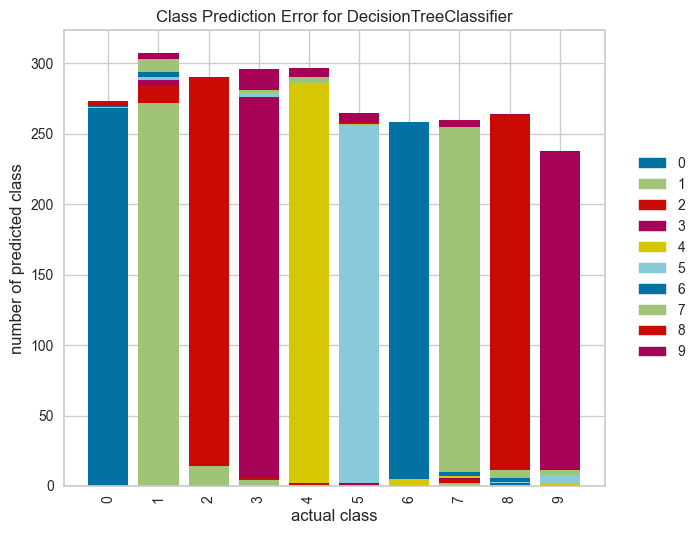

<Axes: title={'center': 'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [24]:
visualizer = ClassPredictionError(dt_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


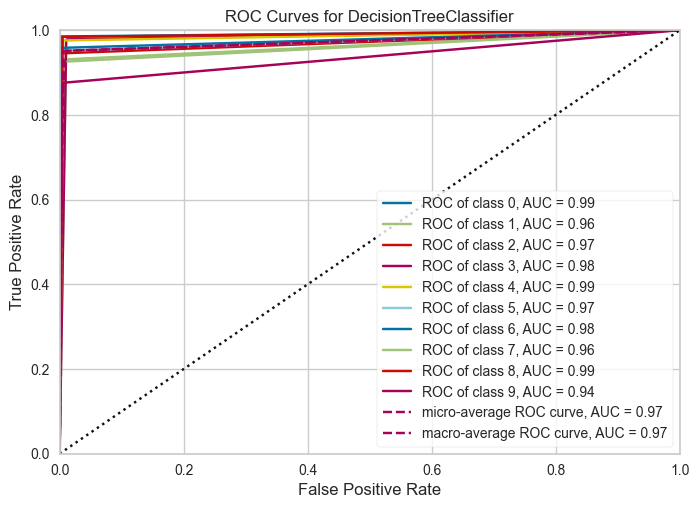

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [25]:
visualizer = ROCAUC(dt_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()   

### Implement Decision Tree Classifier w/ Cleaned Data (outliers dropped)

In [26]:
X_cleaned=data_cleaned.drop("class", axis=1)
y_cleaned=data_cleaned["class"]

In [27]:
X_train, X_test, y_train, y_test= train_test_split (X_cleaned,y_cleaned,test_size=0.25, shuffle=False)

In [28]:
dt_model_cleaned=DecisionTreeClassifier()
dt_model_cleaned.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
eval_metric(dt_model_cleaned, X_train, y_train, X_test, y_test) 

Test_Set
[[270   1   0   0   0   0   0   0   0   0]
 [  0 241  22   0   1   0   0   1   1   0]
 [  0   8 279   0   0   0   3   2   0   0]
 [  0   2   2 264   0   2   2   2   0   1]
 [  0   0   0   1 283   1   2   0   0   1]
 [  0   0   0   5   1 247   1   2   2   6]
 [  3   0   1   0   4   0 245   1   4   2]
 [  0   9   5   2   0   1   1 236   4   2]
 [  1   0   0   0   0   2   0   1 247   0]
 [  0   1   0   2   2   4   0   3   1 252]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       271
           1       0.92      0.91      0.91       266
           2       0.90      0.96      0.93       292
           3       0.96      0.96      0.96       275
           4       0.97      0.98      0.98       288
           5       0.96      0.94      0.95       264
           6       0.96      0.94      0.95       260
           7       0.95      0.91      0.93       260
           8       0.95      0.98      0.97       251
           9       

In [30]:
scores=cross_validate(dt_model_cleaned, X_train, y_train, 
                      scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                      return_train_score=True,
                      cv=5,
                      n_jobs=-1)
pd.DataFrame(scores)

fit_time  score_time  test_accuracy  train_accuracy  test_precision_macro  \
0  0.035819    0.003599       0.957276             1.0              0.957162   
1  0.036118    0.003627       0.962848             1.0              0.963201   
2  0.036879    0.003947       0.962229             1.0              0.961956   
3  0.035311    0.003696       0.960347             1.0              0.960339   
4  0.036183    0.003546       0.939901             1.0              0.940334   

   train_precision_macro  test_recall_macro  train_recall_macro  \
0                    1.0           0.956910                 1.0   
1                    1.0           0.962524                 1.0   
2                    1.0           0.962013                 1.0   
3                    1.0           0.960304                 1.0   
4                    1.0           0.939631                 1.0   

   test_f1_macro  train_f1_macro  
0       0.956963             1.0  
1       0.962582             1.0  
2       0.961928             1.0  
3       0.960162             1.0  
4       0.939637             1.0

In [31]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_accuracy            0.956520
train_accuracy           1.000000
test_precision_macro     0.956598
train_precision_macro    1.000000
test_recall_macro        0.956276
train_recall_macro       1.000000
test_f1_macro            0.956254
train_f1_macro           1.000000
dtype: float64

In [32]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "sqrt", "log2", 2, 3,4, 5,6, 7],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [33]:
dt_model_cleaned=DecisionTreeClassifier(random_state=101)
dt_grid_cleaned=GridSearchCV(estimator=dt_model_cleaned, 
                     param_grid=param_grid, 
                     scoring="f1_macro",
                     verbose=2,
                     n_jobs=-1)
dt_grid_cleaned.fit(X_train, y_train)

Fitting 5 folds for each of 4410 candidates, totalling 22050 fits
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_macro', verbose=2)

In [34]:
dt_grid_cleaned.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [35]:
dt_grid_cleaned.best_score_

0.9561813603770764

In [36]:
dt_model_cleaned=DecisionTreeClassifier(min_samples_split=3,splitter="best", random_state=101)


scores_cleaned=cross_validate(dt_model_cleaned, X_train, y_train, 
                      scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                      return_train_score=True,
                      cv=5,
                      n_jobs=-1)
pd.DataFrame(scores_cleaned)

fit_time  score_time  test_accuracy  train_accuracy  test_precision_macro  \
0  0.039282    0.006846       0.956656        0.998606              0.956389   
1  0.046199    0.003769       0.966563        0.997522              0.966808   
2  0.044668    0.004628       0.960372        0.996903              0.960583   
3  0.038674    0.004021       0.960347        0.998761              0.960577   
4  0.037634    0.004040       0.938042        0.997832              0.938157   

   train_precision_macro  test_recall_macro  train_recall_macro  \
0               0.998602           0.956381            0.998619   
1               0.997524           0.966211            0.997489   
2               0.996889           0.960224            0.996884   
3               0.998762           0.960415            0.998743   
4               0.997827           0.937842            0.997823   

   test_f1_macro  train_f1_macro  
0       0.956329        0.998609  
1       0.966339        0.997501  
2       0.960221        0.996878  
3       0.960285        0.998751  
4       0.937733        0.997820

In [37]:
scores_cleaned = pd.DataFrame(scores_cleaned, index=range(1,6))
scores_cleaned.iloc[:, 2:].mean()

test_accuracy            0.956396
train_accuracy           0.997925
test_precision_macro     0.956503
train_precision_macro    0.997921
test_recall_macro        0.956215
train_recall_macro       0.997912
test_f1_macro            0.956181
train_f1_macro           0.997912
dtype: float64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


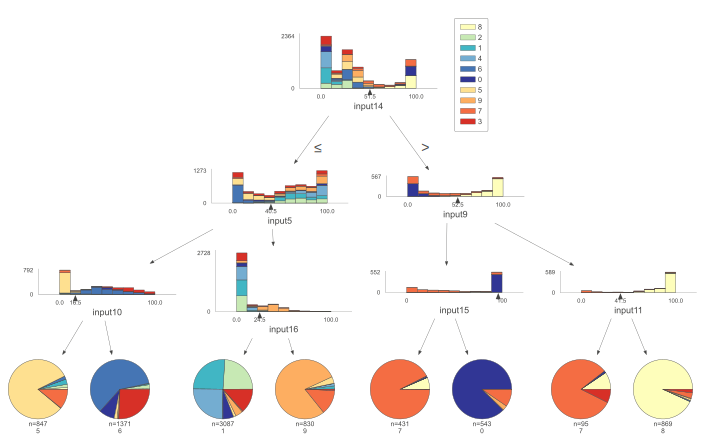

In [38]:
# Example of another visualizer

import dtreeviz
dt_model_cleaned=DecisionTreeClassifier(min_samples_split=3,splitter="best", random_state=101, max_depth=3)
dt_model_cleaned.fit(X_train, y_train)

viz_model = dtreeviz.model(dt_model_cleaned,
                           X_train=X_train, y_train=y_train,
                           feature_names=newfeat,
                           class_names=ynew)

v = viz_model.view()     # render as SVG into internal object 
viz_model.view()       # in notebook, displays inline

#### Comparison between data with/without outlier cleaning

In [39]:
score_cv=scores.iloc[:, 2:].mean()
score_cleaned_cv=scores_cleaned.iloc[:, 2:].mean()

pd.DataFrame({"score_cv": score_cv,"score_cleaned_cv":score_cleaned_cv})

score_cv  score_cleaned_cv
test_accuracy          0.956520          0.956396
train_accuracy         1.000000          0.997925
test_precision_macro   0.956598          0.956503
train_precision_macro  1.000000          0.997921
test_recall_macro      0.956276          0.956215
train_recall_macro     1.000000          0.997912
test_f1_macro          0.956254          0.956181
train_f1_macro         1.000000          0.997912

### Implement Decision Tree Classifier w/ Bagging

In [40]:
dt_model_bagging=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=20)
dt_model_bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=20)

In [41]:
eval_metric(dt_model_bagging, X_train, y_train, X_test, y_test) 

Test_Set
[[268   0   0   0   0   0   2   0   1   0]
 [  0 245  19   0   1   0   0   1   0   0]
 [  0   6 281   1   0   0   2   2   0   0]
 [  0   2   0 271   0   1   0   0   0   1]
 [  0   0   0   0 288   0   0   0   0   0]
 [  0   0   0   5   0 252   0   1   2   4]
 [  1   1   1   0   0   0 256   0   1   0]
 [  0   5   4   0   0   0   0 248   3   0]
 [  2   0   0   0   0   0   0   0 249   0]
 [  0   0   0   1   0   1   0   2   1 260]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       271
           1       0.95      0.92      0.93       266
           2       0.92      0.96      0.94       292
           3       0.97      0.99      0.98       275
           4       1.00      1.00      1.00       288
           5       0.99      0.95      0.97       264
           6       0.98      0.98      0.98       260
           7       0.98      0.95      0.96       260
           8       0.97      0.99      0.98       251
           9       

In [42]:
scores_bagging=cross_validate(dt_model_bagging, X_train, y_train, 
                      scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                      return_train_score=True,
                      cv=5,
                      n_jobs=-1)
pd.DataFrame(scores_bagging)

fit_time  score_time  test_accuracy  train_accuracy  test_precision_macro  \
0  0.448362    0.007564       0.981424        0.999535              0.981357   
1  0.460408    0.007900       0.983901        0.999690              0.984008   
2  0.454717    0.007842       0.984520        0.999845              0.984821   
3  0.448233    0.007469       0.979554        0.999536              0.979695   
4  0.452194    0.007626       0.959108        0.999536              0.959749   

   train_precision_macro  test_recall_macro  train_recall_macro  \
0               0.999547           0.981247            0.999521   
1               0.999707           0.983778            0.999683   
2               0.999840           0.984467            0.999843   
3               0.999561           0.979597            0.999523   
4               0.999551           0.958864            0.999524   

   test_f1_macro  train_f1_macro  
0       0.981263        0.999534  
1       0.983804        0.999695  
2       0.984604        0.999841  
3       0.979572        0.999542  
4       0.959053        0.999537

In [43]:
param_grid = {"n_estimators":[10,20,25,30],
              "bootstrap":[True, False],
              "max_features":[1,2, 3,4, 5,6, 7],
              "max_samples": [0.2, 0.5, 1, 2]}

In [44]:
dt_model_bagging=BaggingClassifier(estimator=DecisionTreeClassifier())
dt_grid_bagging=GridSearchCV(estimator=dt_model_bagging, 
                     param_grid=param_grid, 
                     scoring="f1_macro",
                     verbose=2,
                     n_jobs=-1)
dt_grid_bagging.fit(X_train, y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[CV] END bootstrap=True, max_features=1, max_samples=0.2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_features=1, max_samples=0.2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_features=1, max_samples=0.2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_features=1, max_samples=0.2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_features=1, max_samples=0.2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_features=1, max_samples=0.2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_features=1, max_samples=0.2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_features=1, max_samples=0.2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_features=1, max_samples=0.2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_features=1, max_samples=0.2, n_estimators=20; total time=   0

GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4, 5, 6, 7],
                         'max_samples': [0.2, 0.5, 1, 2],
                         'n_estimators': [10, 20, 25, 30]},
             scoring='f1_macro', verbose=2)

In [45]:
dt_grid_bagging.best_params_

{'bootstrap': False, 'max_features': 7, 'max_samples': 0.5, 'n_estimators': 20}

In [46]:
dt_grid_bagging.best_score_

0.9857970483558255

In [47]:
dt_model_bagging_cv=BaggingClassifier(estimator=DecisionTreeClassifier(), bootstrap=False, max_features=7, n_estimators=25, max_samples= 0.5)


scores_bagging_cv=cross_validate(dt_model_bagging_cv, X_train, y_train, 
                      scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"],
                      return_train_score=True,
                      cv=5,
                      n_jobs=-1)
pd.DataFrame(scores_bagging_cv)

fit_time  score_time  test_accuracy  train_accuracy  test_precision_macro  \
0  0.253600    0.008603       0.984520        0.999535              0.984568   
1  0.258393    0.008440       0.989474        0.999071              0.989728   
2  0.253513    0.008749       0.991331        0.999690              0.991387   
3  0.248080    0.008571       0.983271        0.999690              0.983294   
4  0.247485    0.009271       0.969641        0.999690              0.970158   

   train_precision_macro  test_recall_macro  train_recall_macro  \
0               0.999545           0.984464            0.999520   
1               0.999077           0.989225            0.999058   
2               0.999709           0.991254            0.999684   
3               0.999697           0.983200            0.999680   
4               0.999697           0.969266            0.999681   

   test_f1_macro  train_f1_macro  
0       0.984475        0.999532  
1       0.989392        0.999067  
2       0.991282        0.999696  
3       0.983187        0.999689  
4       0.969348        0.999689

In [48]:
scores_bagging_cv = pd.DataFrame(scores_bagging_cv, index=range(1,6))
scores_bagging_cv.iloc[:, 2:].mean()

test_accuracy            0.983647
train_accuracy           0.999535
test_precision_macro     0.983827
train_precision_macro    0.999545
test_recall_macro        0.983482
train_recall_macro       0.999525
test_f1_macro            0.983537
train_f1_macro           0.999534
dtype: float64

In [49]:
score_bagging_cv=scores_bagging_cv.iloc[:, 2:].mean()

pd.DataFrame({"score_cv": score_cv,"score_cleaned_cv":score_cleaned_cv, "score_bagging_cv": score_bagging_cv})

score_cv  score_cleaned_cv  score_bagging_cv
test_accuracy          0.956520          0.956396          0.983647
train_accuracy         1.000000          0.997925          0.999535
test_precision_macro   0.956598          0.956503          0.983827
train_precision_macro  1.000000          0.997921          0.999545
test_recall_macro      0.956276          0.956215          0.983482
train_recall_macro     1.000000          0.997912          0.999525
test_f1_macro          0.956254          0.956181          0.983537
train_f1_macro         1.000000          0.997912          0.999534

In [50]:
dt_model_bagging_final=BaggingClassifier(estimator=DecisionTreeClassifier(), bootstrap=False, max_features=7, n_estimators=25, max_samples= 0.5)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names


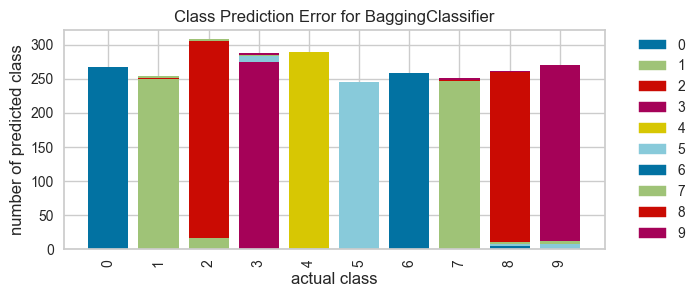

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


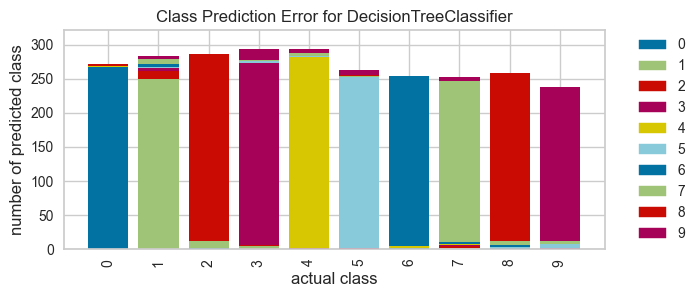

In [57]:
fig = plt.figure()


plt.subplot(2,1,1)
visualizer = ClassPredictionError(dt_model_bagging_final)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

plt.subplot(2,1,2)
visualizer = ClassPredictionError(dt_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show();

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names


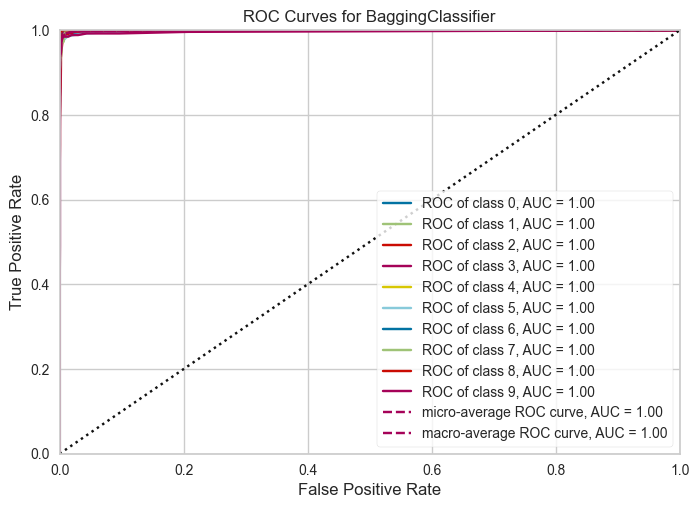

In [54]:
visualizer = ROCAUC(dt_model_bagging_final, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show();

#  Conclusion

* Decision Tree model test results were slightly increased while train results decreased with cleaned data. It seems that overfit decreased slightly after dropping outliers.
* Cleaned data also used with bagging method for comparison. The results were better both for test and training scores. Overall results showed that overfitting eliminated with a better test scores with cleaned data & bagging.